# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds3001f25/eda_assignment.git`
### Do Q1, Q2, and Q3.

**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
   - See "Q1_Parts123.png" in the repo.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
   - See "Q1_Parts123.png" in the repo.
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
   - See "Q1_Parts123.png" in the repo.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range? 
   - 4: Let the median of X be m. By definition, 50% of the sample values are less than or equal to m, and 50% of the sample values are greater than or equal to m. Applying a non-decreasing transformation (g(x)) gives two cases. (1) If x is less than or equal to m, g(x) must also be less than or equal to g(m) by definition of non-decreasing. Similarly, (2) if x is greater than or equal tom, g(x) must also be greater than or equal to g(m). Thus, the median is still in the center of the data, and this transformed median is still the median. This applies to any quantile by the same logic (just using X% and (100-X)% instead of 50% and 50% to separate the data). To get the IQR and the range, you can apply the transformation to the quartiles they rely on, and then calculate. The IQR/range will have different values, but the new edges (quartiles and max/min) are just the transformed relevant quartiles.
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?
   - No. Example: X = {1, 3} and g(x) = x^2. m(X) = 2. g(m(X)) = g(2) = 4. However, m(g(X)) = (1^2 + 3^2)/2 = 5. 4 does not equal 5, so this is not always true.

**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
      - The data has 30,478 rows (observations) and 13 columns (variables). The variables included are 'Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type', 'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds', 'Number of Records', 'Number Of Reviews', 'Price', and 'Review Scores Rating'. 
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
      - Most of the rentals are "Entire home/apt" across various property types. However, "Private room" rentals are much more common in "Bed & Breakfast", "Dorm", and "House" properties compared to renting the entire property. Additionally, "Apartment" is by far the most common property type overall.
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
      -  Yes, without any transformation, the data are badly scaled and there are many outliers in the 'Price' variable. The plots show a right-skewed distribution with a long tail of high prices. It is pretty hard to read. After applying the log transformation, the distribution becomes more symmetric and the outliers are less extreme.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
     - There seems to be a positive correlation between 'price_log' and 'Beds', indicating that properties with more beds tend to have higher prices. This makes sense. Additionally, the variability in prices seems to decrease as the number of beds increases, likely because there are fewer many-bed properties in the dataset. This creates a funnel shape in the plot. After grouping by beds, these patterns are confirmed. Ignoring outliers, the average price tends to increase with the number of beds when looking at the quartiles. The standard deviation for all bed counts is very high and does not show a clear pattern, likely due to the presence of outliers.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
      - Some patterns I've noticed are that the proportion of "Entire home/apt" rentals increases with the number of beds. Most of the other room types are concentrated in the lower bed counts. Similarly, there is a shift from mostly apartments to mostly houses as the number of beds increases. "Entire home/apt" room type and "Other" property type have the highest average prices and standard deviation. This is probably due to some crazy property that exists that falls here. The median appears to be a more reliable estimate of central tendency in this case, as it is less affected by extreme values and outliers compared to the mean.

(Rows, Columns): (30478, 13)
Variables: ['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type', 'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds', 'Number of Records', 'Number Of Reviews', 'Price', 'Review Scores Rating']


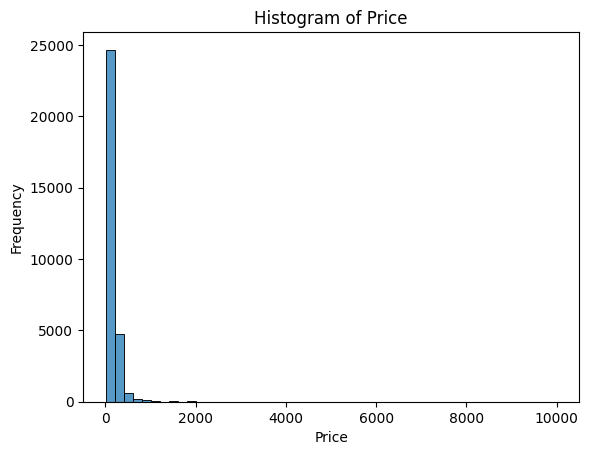

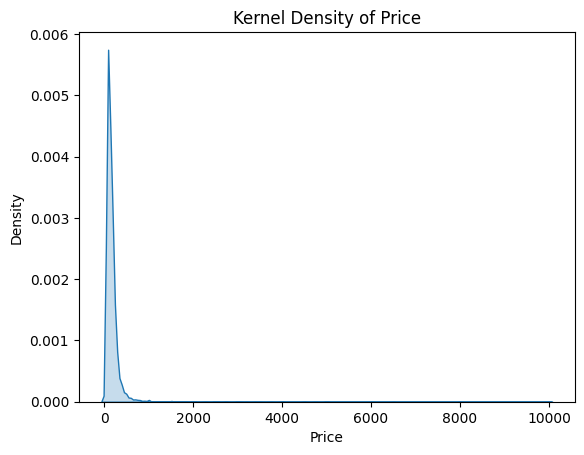

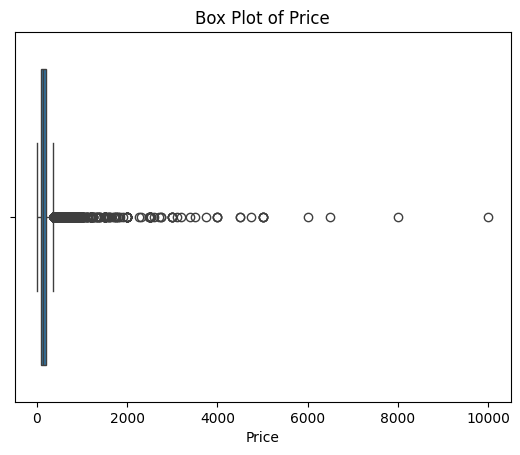

count    30478.000000
mean       163.589737
std        197.785454
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max      10000.000000
Name: Price, dtype: float64


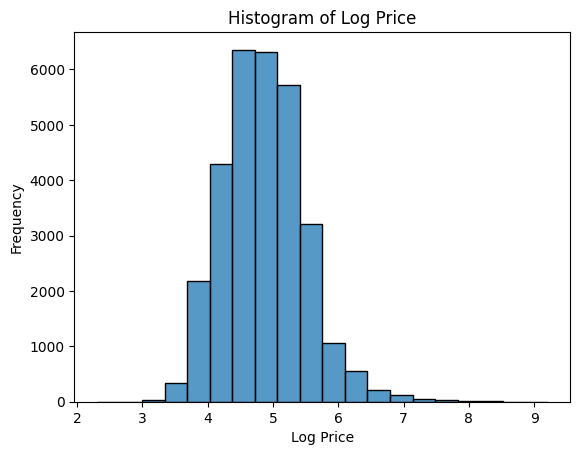

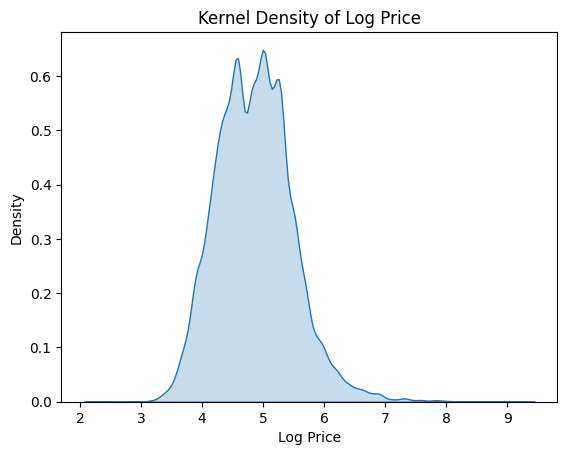

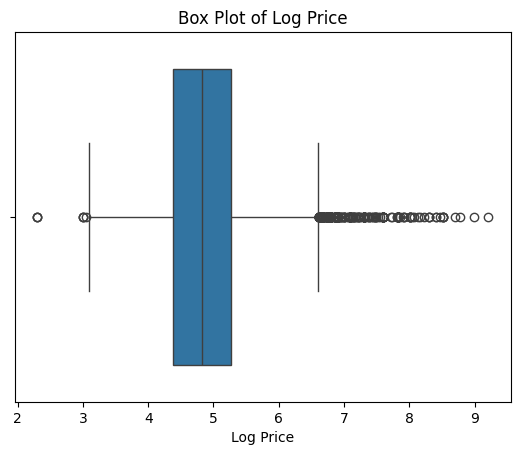

count    30478.000000
mean         4.860495
std          0.627704
min          2.302585
25%          4.382027
50%          4.828314
75%          5.273000
max          9.210340
Name: price_log, dtype: float64


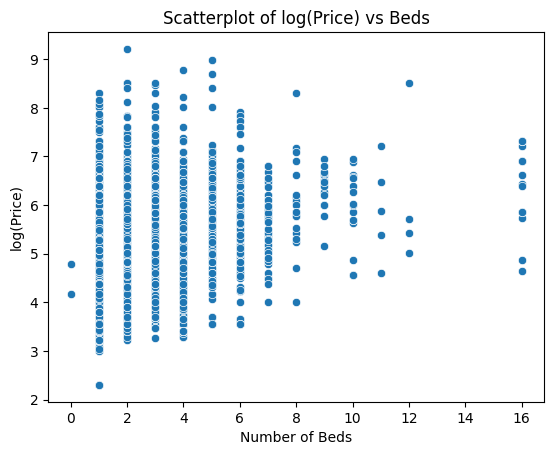

        count         mean          std    min     25%    50%      75%  \
Beds                                                                     
0.0       2.0    92.000000    38.183766   65.0   78.50   92.0   105.50   
1.0   20344.0   127.673810   107.047827   10.0   75.00  100.0   155.00   
2.0    6610.0   199.061271   225.706318   25.0  115.00  160.0   225.00   
3.0    2071.0   268.118300   303.106942   26.0  140.00  200.0   300.00   
4.0     783.0   315.332056   353.184402   27.0  150.00  247.0   375.00   
5.0     284.0   411.500000   672.610659   35.0  189.75  290.0   450.00   
6.0     177.0   401.768362   417.018431   35.0  199.00  275.0   425.00   
7.0      45.0   341.377778   220.116631   55.0  177.00  300.0   445.00   
8.0      24.0   589.041667   793.054934   55.0  243.75  350.0   481.25   
9.0      15.0   618.000000   233.649616  175.0  447.50  650.0   762.50   
10.0     16.0   480.187500   296.820534   95.0  291.00  407.5   706.25   
11.0      5.0   535.800000   499.21758

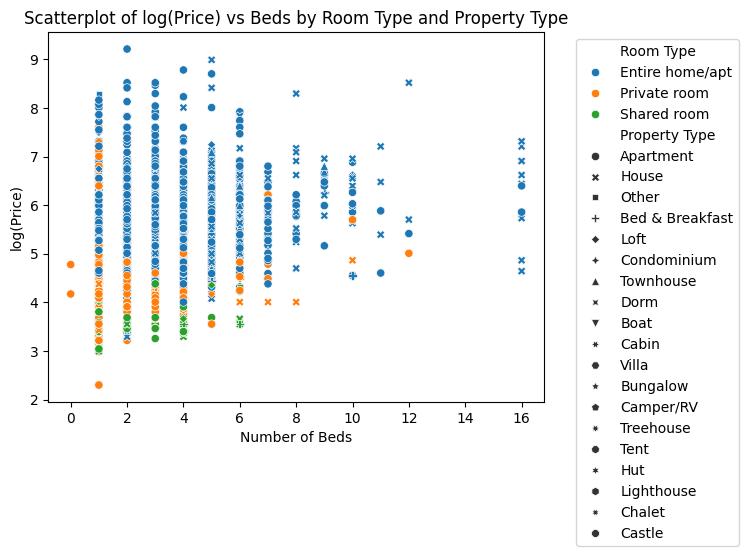

                                   count        mean          std    min  \
Room Type       Property Type                                              
Entire home/apt Apartment        15669.0  213.224839   218.097834   10.0   
                Bed & Breakfast     13.0  184.538462   119.814172   85.0   
                Boat                 7.0  158.428571    51.110524  100.0   
                Bungalow             4.0  150.750000    46.464144   87.0   
                Cabin                1.0  250.000000          NaN  250.0   
                Camper/RV            6.0  114.333333   107.685963   45.0   
                Condominium         72.0  304.861111   266.197497   80.0   
                Dorm                 4.0   44.250000    24.060687   30.0   
                House              752.0  297.263298   468.409428   27.0   
                Lighthouse           1.0   39.000000          NaN   39.0   
                Loft               392.0  330.510204   321.519721   55.0   
            

In [50]:
#Q1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('./data/airbnb_hw.csv')

#Q2
print("(Rows, Columns):", df.shape)
print("Variables:", df.columns.tolist())
df.head()

#Q3
pd.crosstab(df['Room Type'], df['Property Type'])

#Q4
#price conversions
df['Price'] = df['Price'].str.replace('$','').str.replace(',','').astype(float)
df = df.dropna(subset=['Price'])
#histogram
sns.histplot(df['Price'], bins=50, kde=False)
plt.title('Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()
#kernel density
sns.kdeplot(df['Price'], fill=True)
plt.title('Kernel Density of Price')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()
#box plot
sns.boxplot(x=df['Price'])
plt.title('Box Plot of Price')
plt.xlabel('Price')
plt.show()
#statistical description
print(df['Price'].describe())
#log transform
df['price_log'] = np.log(df['Price'])
#histogram of log price
sns.histplot(df['price_log'], bins=20, kde=False)
plt.title('Histogram of Log Price')
plt.xlabel('Log Price')
plt.ylabel('Frequency')
plt.show()
#kernel density of log price
sns.kdeplot(df['price_log'], fill=True)
plt.title('Kernel Density of Log Price')
plt.xlabel('Log Price')
plt.ylabel('Density')
plt.show()
#box plot of log price
sns.boxplot(x=df['price_log'])
plt.title('Box Plot of Log Price')
plt.xlabel('Log Price')
plt.show()
#statistical description of log price
print(df['price_log'].describe())

#Q5
#scatter plot
sns.scatterplot(x='Beds', y='price_log', data=df)
plt.title('Scatterplot of log(Price) vs Beds')
plt.xlabel('Number of Beds')
plt.ylabel('log(Price)')
plt.show()

beds_group = df.groupby('Beds')['Price'].describe()
print(beds_group)

#Q6
sns.scatterplot(x='Beds', y='price_log', hue='Room Type', style='Property Type',data=df)
plt.title('Scatterplot of log(Price) vs Beds by Room Type and Property Type')
plt.xlabel('Number of Beds')
plt.ylabel('log(Price)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside
plt.show()

grouped_stats = df.groupby(['Room Type', 'Property Type'])['Price'].describe()
print(grouped_stats)


**Q3.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
   - The dataset has 623 observations and 10 variables. Not all numeric variables are correctly read in by Pandas, so some will have to be typecast. For example: Crude Oil Rotary Rigs in Operation, Total (Number of Rigs). This will be cleaned by coercing all necessary columns to numeric types and dropping any rows with NaN values that result from this coercion.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
   - The line plot shows a general downward trend in the number of active well service rigs over time, with some fluctuations. There are periods of rapid decrease followed by slight recoveries, but overall the trend is negative.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
   - There is a good amount of volatility in the first difference plot. There is one large negative spike around 2001, and a few other smaller spikes throughout the time series. Overall, the changes seem to oscillate a little below zero, indicating a general downward trend in the number of rigs.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.

Dataset dimensions: (623, 10)


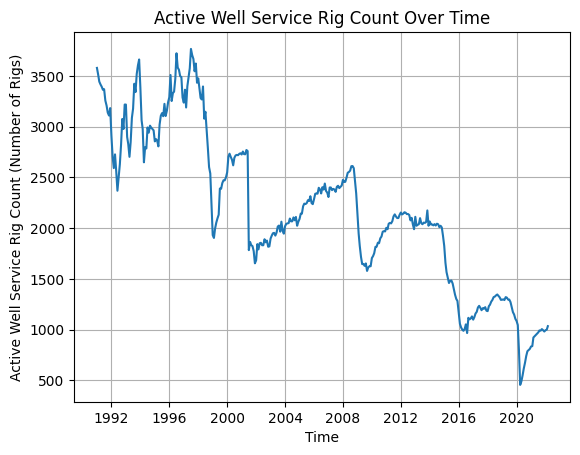

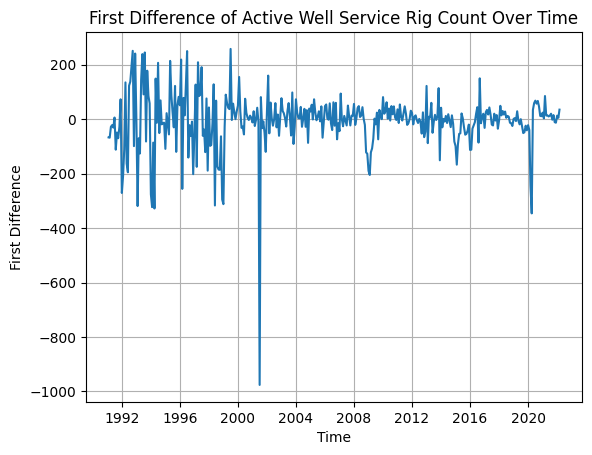

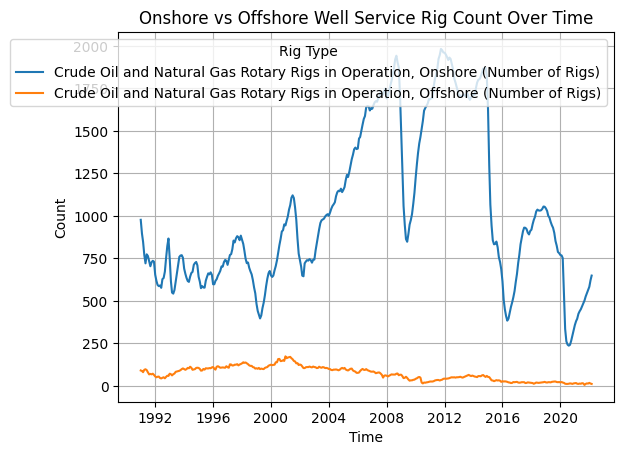

In [ ]:
#Q1
import pandas as pd

rigs_df = pd.read_csv('./data/drilling_rigs.csv')
print("Dataset dimensions:", rigs_df.shape)
rigs_df.dtypes
for col in rigs_df.columns:
    if col != 'Month':
        rigs_df[col] = pd.to_numeric(rigs_df[col], errors='coerce')
rigs_df = rigs_df.dropna()

#Q2
rigs_df['time'] = pd.to_datetime(rigs_df['Month'], format='mixed')
rigs_df = rigs_df.drop(columns=['Month'])

#Q3
plt.plot(rigs_df['time'], rigs_df['Active Well Service Rig Count (Number of Rigs)'])
plt.title('Active Well Service Rig Count Over Time')
plt.xlabel('Time')
plt.ylabel('Active Well Service Rig Count (Number of Rigs)')
plt.grid()
plt.show()

#Q4
rigs_df['First Difference'] = rigs_df['Active Well Service Rig Count (Number of Rigs)'].diff()
plt.plot(rigs_df['time'], rigs_df['First Difference'])
plt.title('First Difference of Active Well Service Rig Count Over Time')
plt.xlabel('Time')
plt.ylabel('First Difference')
plt.grid()
plt.show()

#Q5
melted_df = rigs_df.melt(id_vars=['time'], value_vars=['Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)', 'Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)'], var_name='Rig Type', value_name='Count')
sns.lineplot(data=melted_df, x='time', y='Count', hue='Rig Type')
plt.title('Onshore vs Offshore Well Service Rig Count Over Time')
plt.xlabel('Time')
plt.ylabel('Count')
plt.legend(title='Rig Type')
plt.grid()
plt.show()  